## NAME   :  M UMER
## ROLL    : 19I-1787
## Section :  K

In [15]:
import soundfile as sf
import librosa
import os
import numpy as np
import math

## Task 1 Exctracting Feature

In [16]:

def extract_feature(file_name):
    result=np.array([])
    X, sample_rate = librosa.load(file_name)
    # print(X)
    # print(sample_rate)
    stft = np.abs(librosa.stft(X))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
#     #print('Chroma: ',len(result))   
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    #print(mfccs)
    # print(result)
    result=np.hstack((result, mfccs))
    # print(result)
    # print('MFCC: ',len(result))

# #2)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
#     #print('mel: ',len(mel))
    
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    result = np.hstack((result, tonnetz))
#    # print('Tonn: ',len(result))

    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, contrast))
#     print("Contrast: ",len(result))
    

    return result

In [17]:
# Features
def Feature(l1):
    x_feature = []
    y_feature = []
    emotion2 = []
    #print(l1)
    count = 0 
    for data1 in l1:
        emotion2 = os.path.basename(data1)
        for file_dir in os.walk(data1, topdown=True):
            for file in file_dir:
                if (type(file)==list and file):
                    for file_name in file:
                        result=np.array([])
                        file_name = data1 + '\\' + file_name
                        count = count + 1
                        # print("\nCount: ",count)
                        # print(file_name)
                        result = extract_feature(file_name)
                        x_feature.append(result)
                        y_feature.append(emotion2)
    return x_feature,y_feature

In [18]:
### Final
## TRAIN  
main_dir = 'SERDataset\Train'
emotion = []
for (root,dirs,files) in os.walk(main_dir, topdown=True): 
    if(dirs):
        emotion.append(dirs)
angry = main_dir + '\\' + emotion[0][0]
happy = main_dir + '\\' + emotion[0][1]
neural = main_dir + '\\' + emotion[0][2]
sad = main_dir + '\\'+ emotion[0][3]

l1 = [angry,happy,neural,sad]
x_train,y_train = Feature(l1)

C:\Users\umeri\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [19]:
main_dir1 = 'SERDataset\Test'
emotion1 = []
for (root,dirs,files) in os.walk(main_dir1, topdown=True): 
    if(dirs):
        emotion1.append(dirs)
angry1 = main_dir1 + '\\' + emotion1[0][0]
happy1 = main_dir1 + '\\' + emotion1[0][1]
neural1 = main_dir1 + '\\' + emotion1[0][2]
sad1 = main_dir1 + '\\'+ emotion1[0][3]
ll2 = []
ll1 = [angry1,happy1,neural1,sad1]
x_test,y_test = Feature(ll1)

## Task 2 SVM 

In [20]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear',gamma=0.001,C=1)
model_svc.fit(x_train, y_train)

SVC(C=1, gamma=0.001, kernel='linear')

## Cross Validation Score

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
cross_val_score(model_svc,x_train,y_train,cv=5)

array([0.77922078, 0.84415584, 0.83116883, 0.94805195, 0.77922078])

## Task 3 Plotting

In [22]:
x_h = []
y_h = []
x_a = []
y_a = []
x_s = []
y_s = []
x_n = []
y_n = []
for i,lab in zip(x_train,y_train):
    #print(y_train)
    l = len(i)/2
    eve = math.floor(l) 
    odd = math.ceil(l)
    #print(eve,odd)
    #x.append(np.mean(i[:eve-1]))
    #y.append(np.mean(i[odd:]))
    if(lab == 'Happy'):
        x_h.append(np.mean(i[:eve-1]))
        y_h.append(np.mean(i[odd:]))
    if(lab == 'Angry'):
        x_a.append(np.mean(i[:eve-1]))
        y_a.append(np.mean(i[odd:]))
    if(lab == 'Sad'):
        x_s.append(np.mean(i[:eve-1]))
        y_s.append(np.mean(i[odd:]))
    if(lab == 'Neutral'):
        x_n.append(np.mean(i[:eve-1]))
        y_n.append(np.mean(i[odd:]))

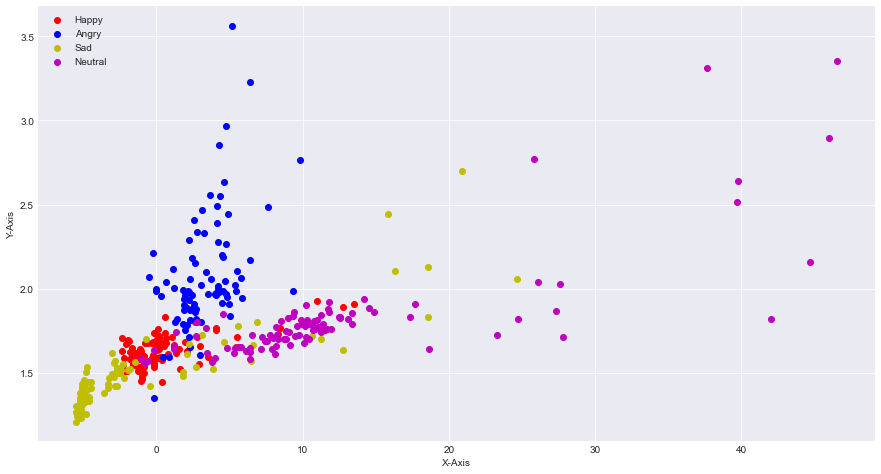

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.scatter(x_h,y_h,c='r',label = 'Happy')
plt.scatter(x_a,y_a,c='b',label = 'Angry')
plt.scatter(x_s,y_s,c='y',label = 'Sad')
plt.scatter(x_n,y_n,c='m',label = 'Neutral')
plt.savefig('file2.png')
plt.ylabel('Y-Axis')
plt.xlabel('X-Axis')
plt.legend(loc=2)

plt.show()


# Task 4a Accuracy

In [24]:
correct_pred =0
predicted_values = model_svc.predict(x_test)
for f, b in zip(predicted_values, y_test):
    if(f==b):
        correct_pred= correct_pred +1
Accuracy = accuracy_score(y_test,predicted_values)*100
#Accuracy = correct_pred/(len(predicted_values))*100
print("Accuracy is : ",str(round(Accuracy,2))+'%')    
print("No. of correct prediction:",correct_pred,"out of ",len(y_test))


Accuracy is :  100.0%
No. of correct prediction: 60 out of  60


# Task 4b Test

In [25]:
test = []
file_name= 'SM25_F34_S084.wav'
feat = extract_feature(file_name)
test.append(feat)
#test = np.array(test)
predicted = model_svc.predict(test)
print("Prediction: ",predicted)

Prediction:  ['Sad']
